Average Ein: 0.17305000000000006
Average Eout: 0.26074740744261604


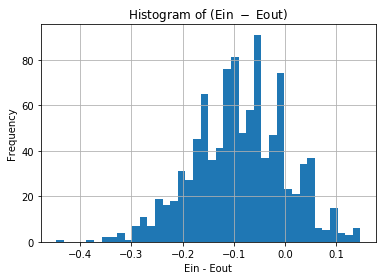

In [6]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline

def sign(x):
    if x >0:
        return 1
    else:
        return -1

X_n=20
Ein_acc=0
Eout_acc=0
Ein_his=[]
Eout_his=[]
for t in range(1000):
    X = (1-(-1))*np.random.rand(X_n)+(-1)
    idx=np.argsort(X[:])
    sample = np.random.rand(X_n)
    Y=[]
    noise_n=0
    for i in range(X_n):
        if sample[i]<0.2:
            noise_n+=1
            Y.append(-sign(X[i]))
        else:
            Y.append(sign(X[i]))
    dich_n=2*X_n
    Ein_min=X_n
    for i in range(len(idx)):
        c=i*2
        Ein_1=0
        Ein_2=0
        x=X[idx[i]]
        for j in range(X_n):
            if X[j]<x:
                x1=-1
                x2=1
            else:
                x1=1
                x2=-1
            if x1!=Y[j]:
                Ein_1+=1
            else:
                Ein_2+=1
        Ein_12=Ein_2
        s=-1
        if Ein_1<Ein_2:
            Ein_12=Ein_1
            s=1
        if Ein_12<Ein_min:
            Ein_min=Ein_12
            s_min=s
            if i==0:
                theta_min=(X[idx[i]]+(-1))/2
            else:
                if X[idx[i]]==X[idx[i-1]]:
                    for kk in range(i-1,-1,-1):
                        if X[idx[i]]!=X[idx[kk]]:
                            theta_min=(X[idx[i]]+X[idx[kk]])/2
                            break
                        else:
                            theta_min_i=(X[idx[i]]+(-1))/2
                else:
                    theta_min=(X[idx[i]]+X[idx[i-1]])/2
    Eout=0.5+0.3*s_min*(abs(theta_min)-1)
    Ein=Ein_min/X_n
    
    Ein_his.append(Ein)
    Eout_his.append(Eout)
    Ein_acc+=Ein
    Eout_acc+=Eout
print('Average Ein:',Ein_acc/1000)
print('Average Eout:',Eout_acc/1000)
Ein_his=np.array(Ein_his)
Eout_his=np.array(Eout_his)
# plt.hist(np.absolute(Ein_his-Eout_his),bins=20)
plt.hist(Ein_his-Eout_his,bins=40)
plt.ylabel('Frequency')
plt.xlabel('Ein - Eout')
plt.title(r'$\mathrm{Histogram\ of\ (Ein\ -\ Eout)}$')
plt.grid(True)
plt.show()